# Stock Market Analysis

- Analysis  of stock data from Tesla, Ford and General Motors(GM), from Jan 1st 2012 to
Jan 1 2017. 
- This project is used to practice my skills with matplotlib, pandas and numpy.
***

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime 

# Set the graph styles to
plt.style.use('classic')
mpl.rcParams['patch.force_edgecolor'] = True
# Magic function which allows matplotlib graphs to be included in the notebook, next to the code 
%matplotlib inline

## Reading Data

In [2]:
tesla = pd.read_csv('Tesla_Stock.csv',index_col = 'Date', parse_dates = True)
ford = pd.read_csv('Ford_Stock.csv',index_col = 'Date', parse_dates = True)
gm  = pd.read_csv('GM_Stock.csv',index_col = 'Date', parse_dates = True)

# Visualising the data

##### Open Price

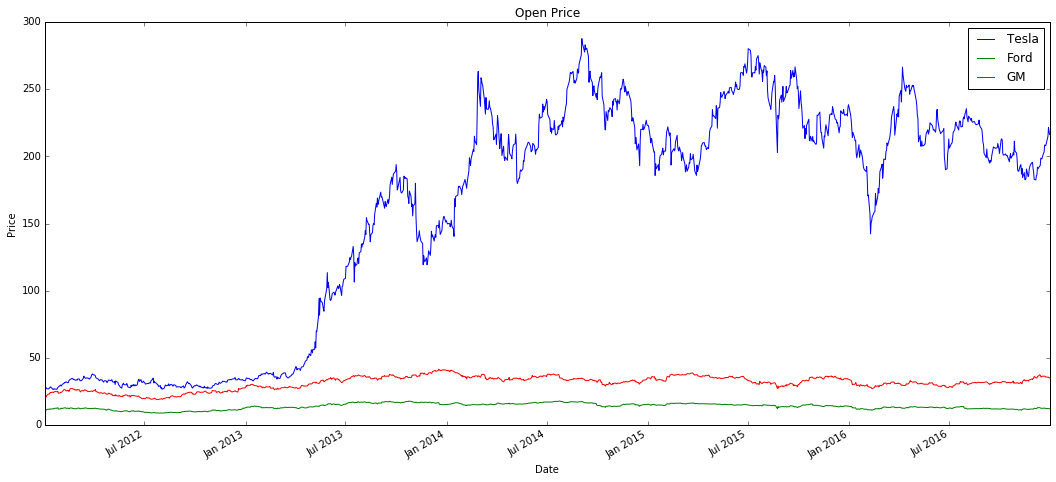

In [3]:
tesla['Open'].plot(label = 'Tesla',figsize=(18,8),lw = 1, title = 'Open Price')
ford['Open'].plot(label = 'Ford', lw = 1)
gm['Open'].plot(label = 'GM', lw = 1)
plt.ylabel("Price")
plt.legend();

- The Open Price graph makes Tesla look like it's always been much more valuable than GM and Ford.
- It would be better to look at the total market cap to get a clearer understanding but current data does not have information of the total units of stock. 
- An alternative would be to carry out a crude calculation of total money traded which would be to multiply the volume by open price.

##### Volume Traded

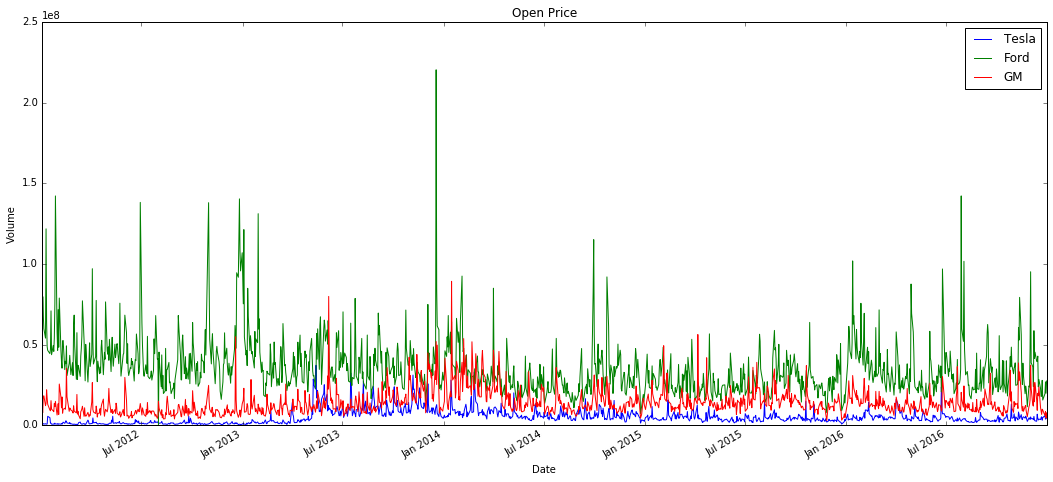

In [4]:
tesla['Volume'].plot(label = 'Tesla',figsize=(18,8), lw = 1, title = 'Open Price')
ford['Volume'].plot(label = 'Ford', lw = 1)
gm['Volume'].plot(label = 'GM', lw = 1)
plt.ylabel("Volume")
plt.legend();

 - Using: ford['Volume'].idxmax() = Timestamp('2013-12-18 00:00:00')
 - We see a large spike on this date due to Ford announcing a profit warning that said the cost of launching new products would cut into the next year's profits which in turn caused a big sell off of their stock.

##### Total Money Trade [Volume*Open Price]

In [5]:
# Create new column for each dataframe which contains Volume * Open Price
tesla['Total Traded'] = tesla['Volume']*tesla['Open']
ford['Total Traded'] = ford['Volume']*ford['Open'] 
gm['Total Traded'] = gm['Volume']*gm['Open'] 

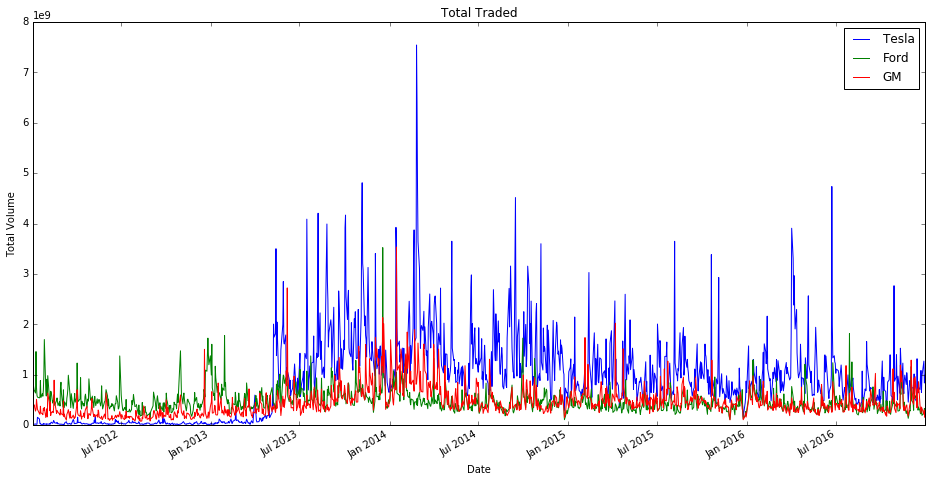

In [6]:
# Visualisation of total money being traded
tesla['Total Traded'].plot(figsize=(16,8),title='Total Traded',label='Tesla')
ford['Total Traded'].plot(figsize=(16,8),title='Total Traded',label='Ford')
gm['Total Traded'].plot(figsize=(16,8),title='Total Traded',label='GM')
plt.ylabel('Total Volume')
plt.legend(loc=0);

- tesla['Total Traded'].idxmax() = Timestamp('2014-02-25 00:00:00')
- Large amount of money traded for Tesla which was due to a bullish report from MS and the Tesla Model S being named the best overall car of 2014.

## Moving Averages

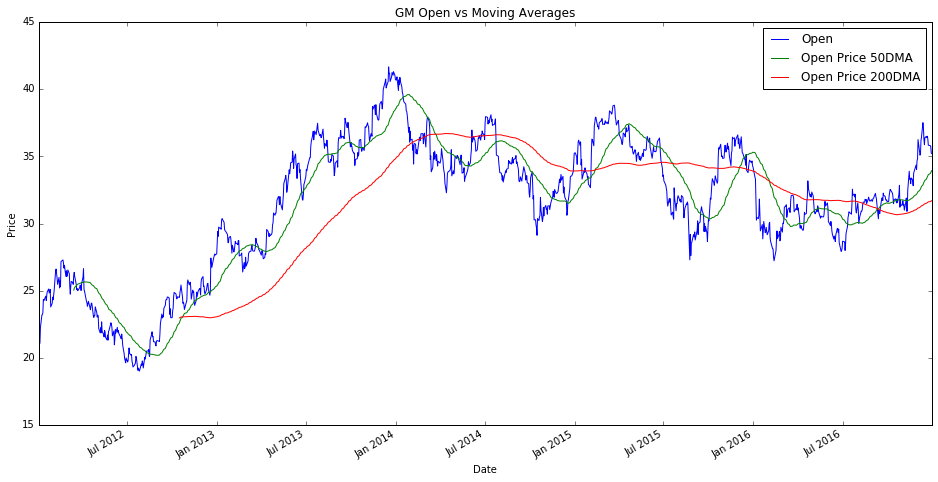

In [7]:
gm['Open Price 50DMA'] = gm['Open'].rolling(50).mean()
gm['Open Price 200DMA'] = gm['Open'].rolling(200).mean()
gm[['Open','Open Price 50DMA','Open Price 200DMA']].plot(figsize=(16,8),title = 'GM Open vs Moving Averages')
plt.ylabel('Price');

## Scatter Matrix Plot

In [8]:
from pandas.plotting import scatter_matrix

In [9]:
scatter_df = pd.concat((tesla['Open'],ford['Open'],gm['Open']),axis = 1)
scatter_df.columns = ['Tesla Open','Ford Open','GM Open']

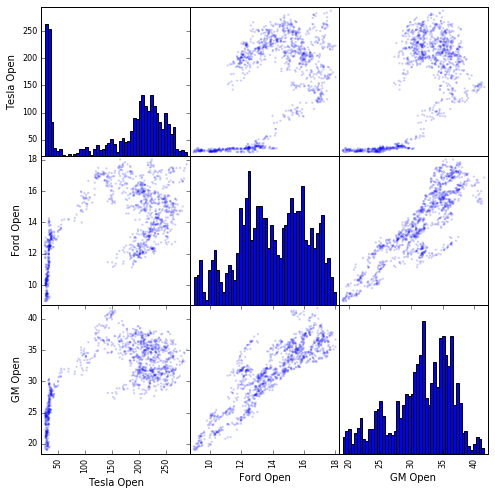

In [10]:
scatter_matrix(scatter_df,hist_kwds={'bins':50},alpha=0.2,figsize=(8,8),c = 'b');
# hist_kwds is a dictionary that take key,values from matplotlibs own histogram

- GM and Ford have a positive correlation while Tesla is not related and has different behaviour. This is expected since we saw from the Opening prices time series that it had a much more different behaviour and price level compared to GM and Ford.
- Using a smaller alpha allows us to see darker areas which mean that there is a concentration of data points there.

## Candlestick Chart for Ford Stock (Jan 2012)

In [11]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num
from mpl_finance import candlestick_ohlc #ohlc = openhighlowclose

In [12]:
# Reset index column to apply date2num function to dates 
ford_reset = ford.loc['2012-01'].reset_index() 
#call date2num to turn date into numerical value to be fed into matplotlib 
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date)) 
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,734505.0
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,734506.0
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,734507.0
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,734508.0
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,734511.0


In [13]:
# Create list of tuples to be fed into candlestick_ohlc
list_cols = ['date_ax','Open','High','Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[list_cols].values]
ford_values

[(734505.0, 11.0, 11.25, 10.99, 11.13),
 (734506.0, 11.15, 11.53, 11.07, 11.3),
 (734507.0, 11.33, 11.63, 11.24, 11.59),
 (734508.0, 11.74, 11.8, 11.52, 11.71),
 (734511.0, 11.83, 11.95, 11.7, 11.8),
 (734512.0, 12.0, 12.05, 11.63, 11.8),
 (734513.0, 11.74, 12.18, 11.65, 12.07),
 (734514.0, 12.16, 12.18, 11.89, 12.14),
 (734515.0, 12.01, 12.08, 11.84, 12.04),
 (734519.0, 12.2, 12.26, 11.96, 12.02),
 (734520.0, 12.03, 12.37, 12.0, 12.34),
 (734521.0, 12.48, 12.72, 12.43, 12.61),
 (734522.0, 12.55, 12.64, 12.45, 12.59),
 (734525.0, 12.69, 12.84, 12.55, 12.66),
 (734526.0, 12.56, 12.86, 12.46, 12.82),
 (734527.0, 12.8, 12.98, 12.7, 12.93),
 (734528.0, 13.03, 13.05, 12.66, 12.79),
 (734529.0, 11.96, 12.53, 11.79, 12.21),
 (734532.0, 12.06, 12.44, 12.0, 12.29),
 (734533.0, 12.47, 12.51, 12.2, 12.42)]

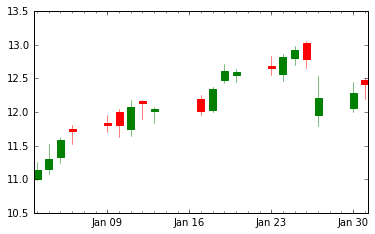

In [14]:
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator() # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # .e.g Jan 12
dayFormatter = DateFormatter('%d') # e.g. 12

# Matplotlib 
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r');

# Calculating Daily Percentage Change

- Daily percentage change is defined by the following formula:
$ r_t = \frac{p_t}{p_{t-1}} -1$
- Useful for analysing the volatility of a stock/security. If daily returns have a wide distribution, the stock is more volatile from one day to the next

In [15]:
tesla['Returns'] = tesla['Close']/tesla['Close'].shift(1)-1
ford['Returns'] = ford['Close']/ford['Close'].shift(1)-1
gm['Returns'] = gm['Close']/gm['Close'].shift(1)-1
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,Returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [16]:
# Alternate method
tesla['Returns'] = tesla['Close'].pct_change(1)
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,Returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


## Histograms of Returns

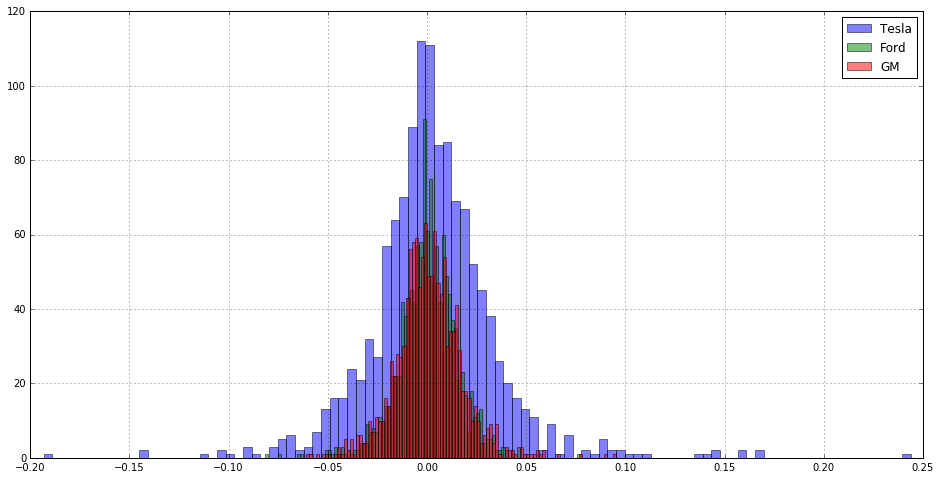

In [17]:
# Stacked histograms of Tesla, Ford and GM stock returns 
tesla['Returns'].hist(label='Tesla',bins=100,figsize=(16,8),alpha=0.5)
ford['Returns'].hist(label='Ford',bins=100,alpha=0.5)
gm['Returns'].hist(label='GM',bins=100,alpha = 0.5)
plt.legend(loc=1);

- Tesla has a large variation in returns in comparison 
- GM and Ford tend to be more stable

## Kernel Density Estimation Plot

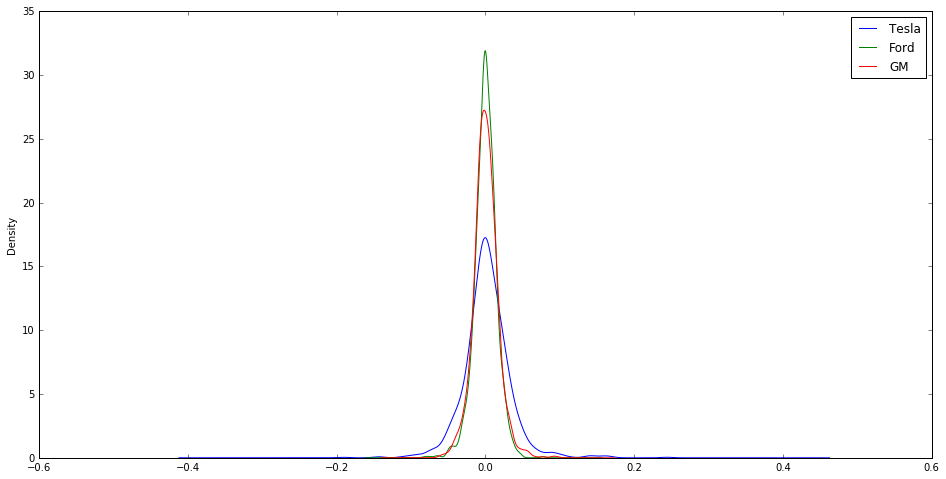

In [18]:
tesla['Returns'].plot(kind='kde',label='Tesla',figsize=(16,8))
ford['Returns'].plot(kind='kde',label='Ford')
gm['Returns'].plot(kind='kde',label='GM')
plt.legend();

- Ford is more stable than Tesla and GM - Ford's daily returns tend to be the same. 
- Tesla has a wider distribution that has tails that reach out further indicating it's volatility.

## Box Plots

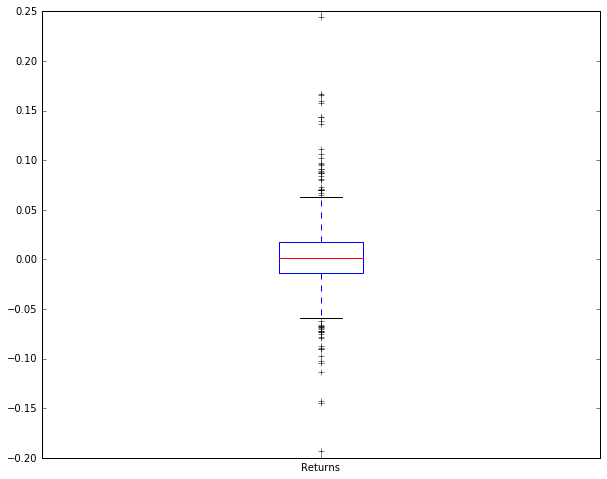

In [19]:
tesla.boxplot('Returns',figsize=(10,8),grid=False);

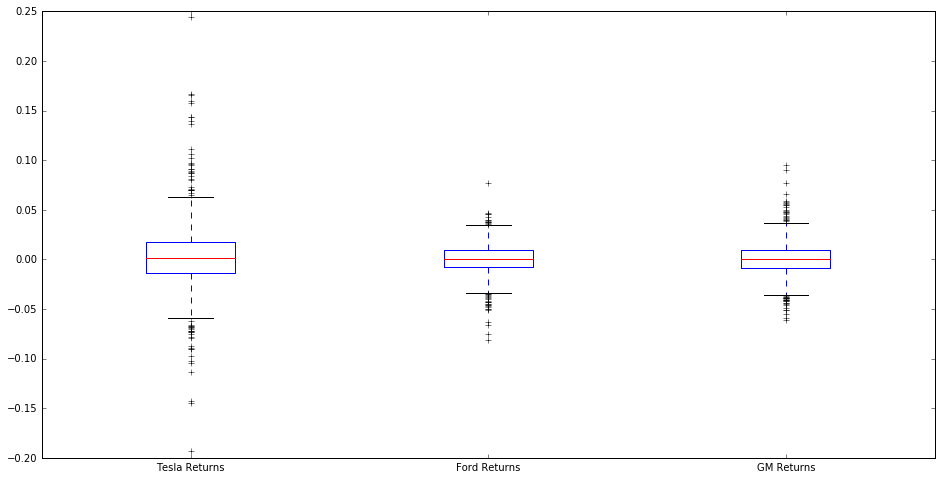

In [20]:
# When using box plots with pandas, you need to place all columns you want to visualise in one dataframe
box_df = pd.concat([tesla['Returns'],ford['Returns'],gm['Returns']],axis=1)
box_df.columns=['Tesla Returns','Ford Returns','GM Returns']
box_df.plot(kind='box',figsize=(16,8));

- Tesla returns have a wider distribution with more outliers
- Ford and GM are relatively similar, with Ford being more stable (similar to KDE plot with higher peak for Ford)

## Comparison of Daily Return between stocks using a Scatter Matrix Plot

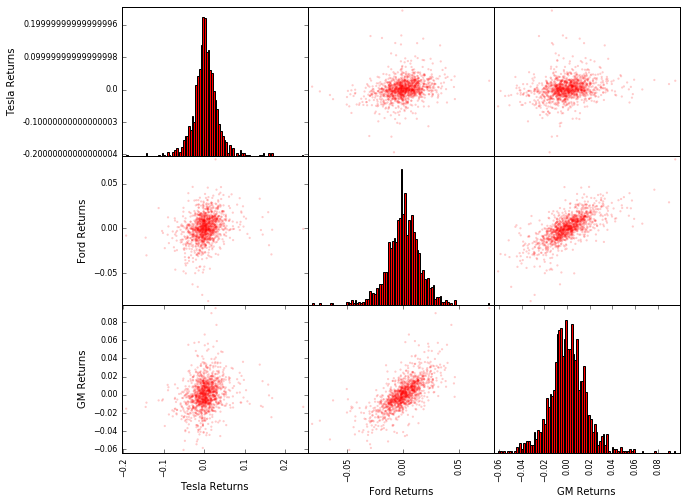

In [21]:
scatter_matrix(box_df,hist_kwds={'bins':100, 'color':['red']},alpha=0.2,figsize=(10,8), c = 'r');

- Formd and GM look like they have some sort of relationship

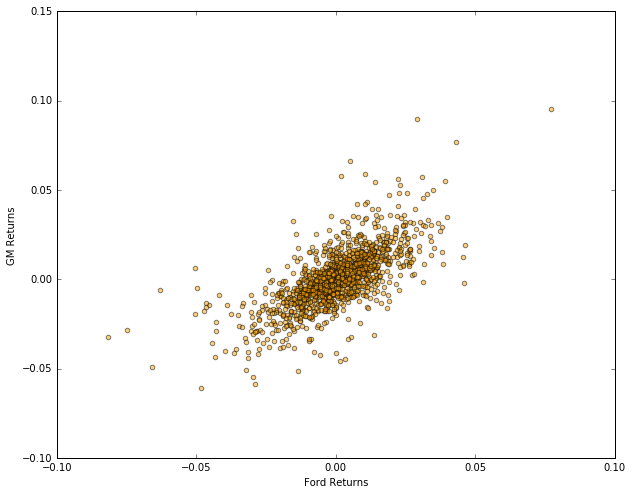

In [22]:
box_df.plot.scatter(x = 'Ford Returns', y= 'GM Returns', figsize=(10,8),alpha=0.5,c='orange');

## Cumulative Daily Returns
- The formula for a cumulative daily return is:

    $ i_i = (1+r_t) * i_{t-1} $
- Cumulative Return is computed relative to the day the investment is made, if it is above one then you are in profit else you are in loss.
- It is the aggregate amount an investment has gained/lost over time, independent of the period of time involved.
- Does not take into account stock dividends.

In [23]:
tesla['Cumulative Returns'] = (1+tesla['Returns']).cumprod()
ford['Cumulative Returns'] = (1+ford['Returns']).cumprod()
gm['Cumulative Returns'] = (1+gm['Returns']).cumprod()
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,Returns,Cumulative Returns
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


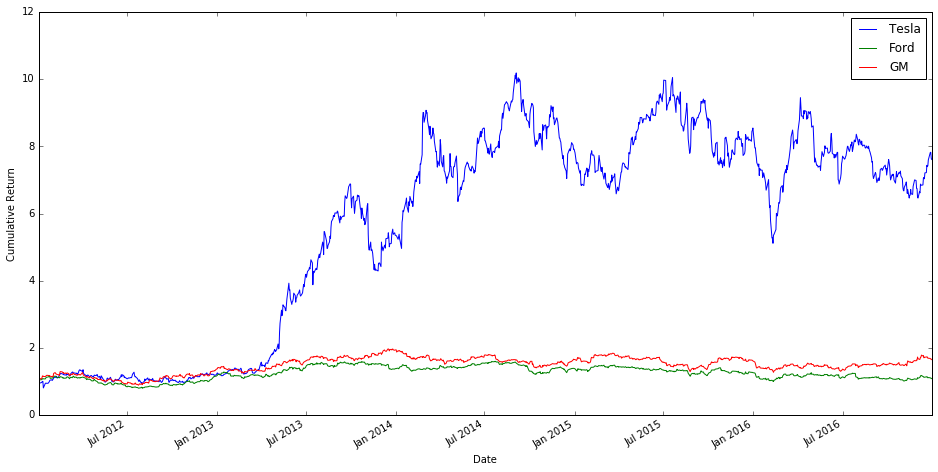

In [24]:
tesla['Cumulative Returns'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Returns'].plot(label='Ford')
gm['Cumulative Returns'].plot(label='GM')
plt.legend(loc=1)
plt.ylabel('Cumulative Return');